# How to access and plot netCDF data Using Copernicus Services Data Hub

In [125]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [126]:
data=Dataset(r'C:\Users\abder\Downloads/R20mm_C3S-glob-agric_gfdl-esm2m_rcp8p5_dek_20410101-20701231_v1.nc')

In [127]:
data.variables.keys()

dict_keys(['time', 'lat', 'lon', 'time_bounds', 'R20mm'])

In [128]:
#creating variables for each variables
lats=data.variables['lat'][:]
lons=data.variables['lon'][:]
time=data.variables['time'][:]
#########################
#Very Important: here I select a specific day from the data set to avoid memory issues
#the 167 day in the year
#########################
day=167
target=data.variables['R20mm'][day]

In [129]:
#map object (llcrnrlon lower left cornet of lattiture and langiture + upper right corner longitude and lattitude)
#use google maps to get lower
mp=Basemap(projection='merc', 
          llcrnrlon=-12.160465,
         llcrnrlat=30.812967, 
         urcrnrlon=40.529960,
         urcrnrlat=41.792086,   
         resolution ='i')

In [130]:
target_test=target[0]

In [131]:
#create a grid in numpy
lon,lat=np.meshgrid(lons,lats)

In [132]:
#specify the coordinate
x,y=mp(lon,lat)
x.shape

(360, 720)

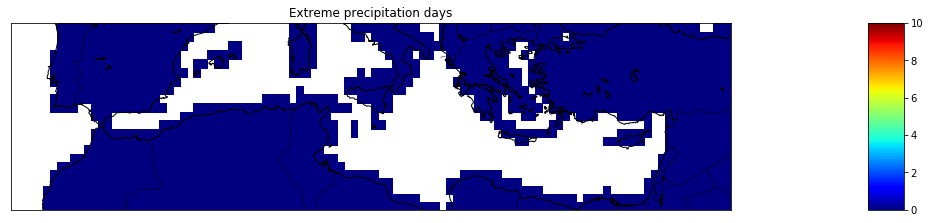

In [133]:
#Alternative way of plotting is to use the contourf function: plt.contourf(x,y,target_test,cmap='jet')

#specification of other things on the map
c_scheme=mp.pcolor(x,y,target,cmap='jet')
#coastlines
mp.drawcoastlines()
#states
mp.drawstates()
#countries
mp.drawcountries()

#adding a color bar in the graphic
cbar=mp.colorbar(c_scheme, location='right',pad='19%')
#add a title to the plot
plt.title('Extreme precipitation days')
#Fixe the size of the plot
#plt.clim(-40,40)
#save the plot
plt.savefig('/Users/abder/Downloads/'+str(day)+'.jpg')
#plt.rcParams["figure.figsize"] = [16,9]